# Proposed GRN to Calculate Signal Average


## GRN Diagram
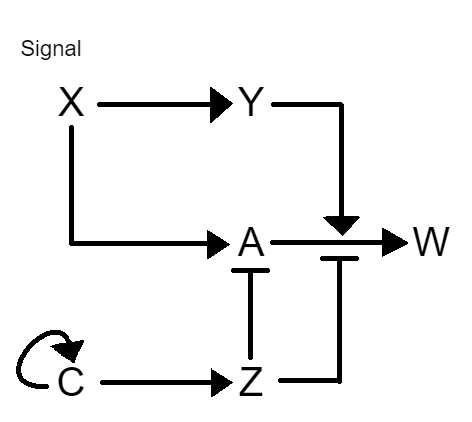

##Defining the System


Now we define the system of equations of the previous network. \
We define $X$ is the input signal, then
\begin{align}
\frac{dY}{dt} &= r_x X - \gamma_y Y,\\
\frac{dC}{dt} &= r_{cc} \frac{k_c^n C^n}{k_c^n+C^n} - \gamma_c C,\\
\frac{dZ}{dt} &= r_c C - \gamma_z Z,\\
\frac{dA}{dt} &= \frac{r_{ax}\cdot k_x}{k_x+Z} X - \frac{r_{ay}\cdot k_y^2}{k_y^2+Z^2} Y - \gamma_z A.\\
\end{align}

The production of $W$ consumes $A$, while $Y$ activates the reaction and $Z$ represses the reaction. The calculated average is the concentration of $A$.\
A large assumption of the system is that activation reactions are linear. In other words $\frac{dA}{dt} = kB$, where $k$ is some constant.\
However, the repression functions are the typical Hill function. The power on each repression in $\frac{dA}{dt}$ is crucial for calculating the average (will be demonstrated later).\
The self-positiveback loop on $C$ keeps the value of C a constant value. It is important to note that the self-activation of $C$ is not linear because linear growth functions will not lead to stability. \





##Derivation and Justification

####Calculating the Average
The goal of this network is to calculate the continuous average of a varying signal input. The average of a function over some interval $[a, b]$ is defined as
$$A = \frac{1}{b-a}\int^b_a X(t) dt.$$
If we generalize the average for a moving time in the interval $[0,t]$, we get
$$A(t) = \frac{1}{t}\int^t_0 X(t) dt.$$
From this, we know that the GRN must consist of 3 main parts: 

1. a component that finds the continuous integral of the signal. 
2. a component that keep tracks of the time elapsed.
3. a component that divides (represses) the signal integral by the time.

\** for the sake of simplicty we will assume that genes don't decay during the mathematical derivations

####Calculating the Integral

The reason a linear growth function was chosen is purely because of its ability to calculate the integral of a signal. Imagine a simple activation of $X$ and $Y$, where
$$\frac{dY}{dt} = r_b X.$$
Solving this ODE analytically gives,
$$Y(t) = r_x \int^t_0 X(t) dt.$$
Hence the linear activation of $Y$ by $X$ is the integral of the signal $X$.

####Keeping Track of the Elapsed Time

Although the simulation knows the elapsed time, the GRN has no way of keeping track of that information. Hence, we need to design a component that increases linearly with time. We can use the idea that the integral of a constant gives a linear function. Combined the the previous section, we can develop a simple activation that produces a linear line. However, all genes decay with time, to mitigate the self decay, we can induce stability (introduces stable points) by adding a self-positive feedback loop on the "constant" gene. Suppose $C$ is the constant gene stabilized through self-feedback at a stable value $C_s$, then we can say
$$\frac{dZ}{dt} = r_c C\text{  and}$$
$$\frac{dC}{dt} = r_{cc} C - \gamma_c C.$$
Then solving for $Z$, we get
$$Z(t) = r_c C_s t.$$

####Dividing the Integral

The equation of the average,
$$A(t) = \frac{1}{t}\int^t_0 X(t) dt,$$
is not expressed in terms of change ($\frac{dA}{dt}$), hence it must be rewritten for the GRN system. To do so, we simply find the dervative of $A(t)$. As such, we arrive at
$$\frac{dA}{dt} = \frac{1}{t}X(t) - \frac{1}{t^2}\int^t_0 X(t) dt.$$
Now that $A(t)$ is converted to $A'(t)$ we can use the characteristics of gene production to design and combine all the previous sections into a single network.


#### Combining the Network Charcteristics
Now that we have all 3 components of the network we can combine them together. We know the signal integral can be represented by $Y$ and the time by $Z$. The division of $t$ is close to the decreasing Hill function. Hence,

$$\frac{dA}{dt} = r_{ax}\frac{k_x}{k_x + Z} X - r_{ay}\frac{k_y^2}{k_y^2+Z^2}Y.$$

The Hill function function
$$\frac{1}{1+Z^n} \approx \frac{1}{Z^n} \approx \frac{1}{t^n}$$
as $t$ increases (the difference is realistically quite small when $t>5$). 


##Determining Constants

Now that we have established the system of equation that models this particular GRN, we need to find the acceptable values of the constants that still produce valid results. Once again, at this stage, we assume the decay of proteins is neglible (except for protein $C$). /
First, we can determine the steady state value of $C$ by setting $\frac{dC}{dt} = 0$. As such, the steady states ($C_s$) of $C$ will be the solutions to
$$\gamma_c C = r_{cc}\frac{C^n}{1+C^n}.$$ 
Provided that $C$ is a constant, we can approximate $Z$ as
$$Z = r_c C_s t.$$
Substiuting this value and the expanded form of $Y$ into the equation of $\frac{dA}{dt}$ gives
$$\frac{dA}{dt} = r_{ax}\frac{k_x}{k_x + r_c C_s t} X - r_{ay}\frac{k_y^2}{k_y^2+(r_c C_s t)^2}r_x \int^t_0 X(t) dt.$$
By comparing the new equation of $\frac{dA}{dt}$ with the ideal equation to calculate average, we arrive at the following system:
\begin{align}
  \frac{r_{ax} \cdot k_x}{1+r_c C_s t} \approx \frac{1}{t}\\
  \frac{r_{ay}r_x \cdot k_x^2}{k_x^2+r_c^2 C_s^2 t^2} \approx \frac{1}{t^2}.
\end{align}
As $t$ increases the constant $k$ term in the denominator becomes insignificant, and we can simplify to
\begin{align}
  \frac{r_{ax} \cdot k_x}{r_c C_s t} \approx \frac{1}{t}\\
  \frac{r_{ay}r_x \cdot k_x^2}{r_c^2 C_s^2 t^2} \approx \frac{1}{t^2}.
\end{align}
Therefore, the constants must satisfy the conditions
\begin{align}
  \frac{r_{ax} \cdot k_x}{r_c C_s} \approx 1 \;\;\text{ and }\;\;
  \frac{r_{ay}r_x \cdot k_x^2}{r_c^2 C_s^2} \approx 1.
\end{align}

##Issues and Improvements

There a few existing issues with the current GRN:
1. The average is dependent on the intial value of $A$
2. Protein decay causes the values of protein concentrations to decrease more when the concentration increases
3. Reaction time of the circuit depends on the protein parameters 
4. The proteins that keep track of the integral and time can increase to a biologically unrealistic amount.

Next I will **try** to address the listed problems
####Problem 1
To be honest, I have no clue how to resolve this issue. This issue arises from the fact that there are a whole class of solutions for $A$ (intial value problem 😢). From experimentation the intial value of $A$ should match the intial value of the signal $X$. Otherwise, the produced average will be shifted vertically by whatever $A_0$ is. Perhaps there is some way to set $A_0 = X_0$ inside the GRN itself.

####Problem 2
The best way to do this is choose proteins where the decay rate it minimized. Moreover, if each protein grows relatively slowly (changed with params), the decay effect will be less pronounced. If we set the dervative to 0, we get
$$Z_{max} = \frac{r_c}{\gamma_z}C_s$$
This maximum value of $Z$ indicates that there is a maximum limit on the effective time interval of the average function. Ideally, the maximum value would exceed a cell's lifespan, so it is able to function properly during that time. Consequently, this "effective period" of $A$ is maximized if $\gamma_z << r_c$.

#### Problem 3 and 4
These two problems are combined together because they are changed by altering the intial parameters. However, there is no way to satisfy BOTH conditions perfectly, so it is important to find a compromize between the two. The response time of the circuit can be increased by increasing the values of $r_n$. However, in doing so, more proteins will be produced, which can lead to the accumulation of an unrealistic amount of proteins within the cell. Alternatively, it may be possible to increase response time by adding self-negative feedback loop on some of the proteins. \
\
One last thing, the resulting average can be negative!! This likely caused by the linear acitivation approximation. 



##Code

[[9.26980729e+02 9.50719803e+02 1.00000000e+00 8.17750222e-01]
 [9.26887943e+02 9.51625591e+02 1.00000000e+00 8.16642868e-01]]


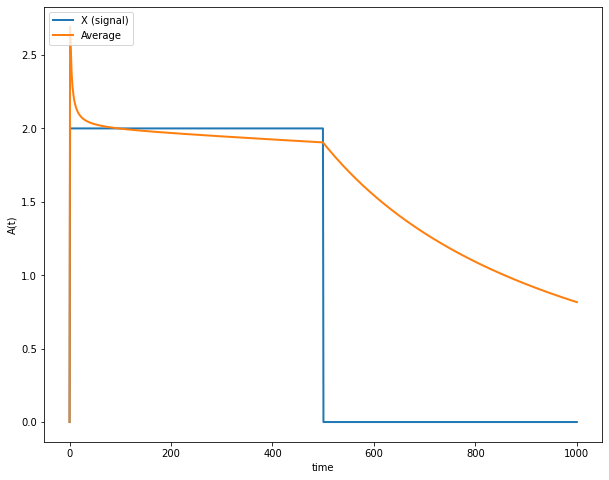

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# CONSTANTS (float declaration is IMPORTANT)

K:float = 1
n = 1

r_x:float = 1
r_c:float = 1
r_cc:float = 1.0
r_ax:float = r_c*1/K
r_ay:float = (r_c*1)**2/r_x/K**2
gamma_y:float = 0.0001
gamma_c:float = 0.5
gamma_z:float = 0.0001
gamma_a:float = 0.0001


X0:float = 1.0
Y0:float = 0.0
C0:float = 1
Z0:float = 0.0
A0:float = 2

#Define the functions

def F(MP, t, X, n):

  Y = MP[0]
  Z = MP[1]
  C = MP[2]
  A = MP[3]
  
  dYdt = r_x * X - gamma_y * Y
  dCdt = r_cc * (C**n / (1+C**n)) - gamma_c * C
  dZdt = r_c * C - gamma_z * Z
  dAdt = (r_ax* (K /(K+Z)) * X) - (r_ay* (K**2 /(K**2+Z**2)) * Y) - gamma_a * A

  '''
  # No decay
  dYdt = r_x * X
  dCdt = 0
  dZdt = C0 # at constant value
  dAdt = (r_ax* (K /(K+Z)) * X) - (r_ay* (K**2 /(K**2+Z**2)) * Y) 
  '''

  return np.array([dYdt, dZdt, dCdt, dAdt])

# Signal Functions
'''
def FS(t):
  return X0*np.sin(0.08*t) + 2*X0 + 0.00001 * t**2
  #return A0*gamma*10*t

'''
def FS(t):
  if t < 500:
    return 2*X0
  return 0
  #return A0*gamma*10*t


# Setting the timespan and detail (sample_number) of simulation
T = 1000
sample_number = 1000

t = np.linspace(0, T, sample_number)
P0 = np.array([Y0, Z0, C0, A0])

X_t = np.linspace(0, T, sample_number)
Y_t = np.linspace(0, T, sample_number)
Z_t = np.linspace(0, T, sample_number)
C_t = np.linspace(0, T, sample_number)
A_t = np.linspace(0, T, sample_number)

# Loop to run solve system of ODEs iteratively (this is required because X 
# changes)
for i in range(1,sample_number):
  # the time span for next timestep 
  # (only previous results and current calculated results are considered)
  tspan = [t[i-1],t[i]]
  # new value of A (variable input)
  X = FS(i)
  # store value of A for graphing
  X_t[i] = X
  # solves ODE for next time step
  P_t = odeint(F, P0, tspan, args=(X, n))
  # stores the value of B for graphing
  Y_t[i] = P_t[1][0]
  Z_t[i] = P_t[1][1]
  C_t[i] = P_t[1][2]
  A_t[i] = P_t[1][3]
  # updates next intial position
  P0[0] = P_t[1][0]
  P0[1] = P_t[1][1]
  P0[2] = P_t[1][2]
  P0[3] = P_t[1][3]


print(P_t)

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(t, X_t, "-", linewidth=2, label="X (signal)")
#plt.plot(t, Y_t, "-", linewidth=2, label="Y (integral)")
#plt.plot(t, Z_t, "-", linewidth=2, label="Z")
#plt.plot(t, C_t, "-", linewidth=2, label="C")
plt.plot(t, A_t, "-", linewidth=2, label="Average")
plt.legend(loc = "upper left")
plt.xlabel("time")
plt.ylabel("A(t)")
plt.show()

##Results

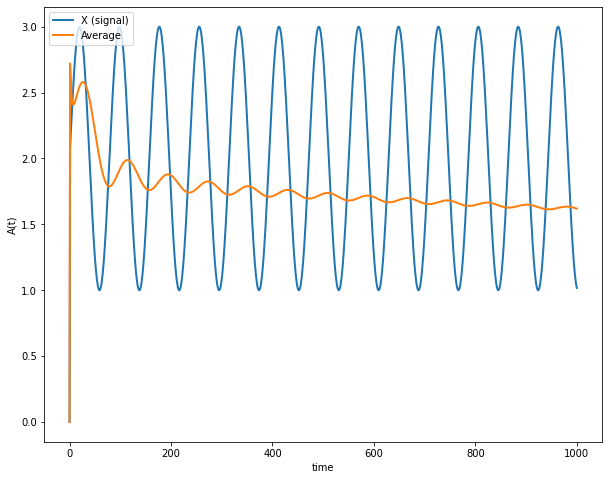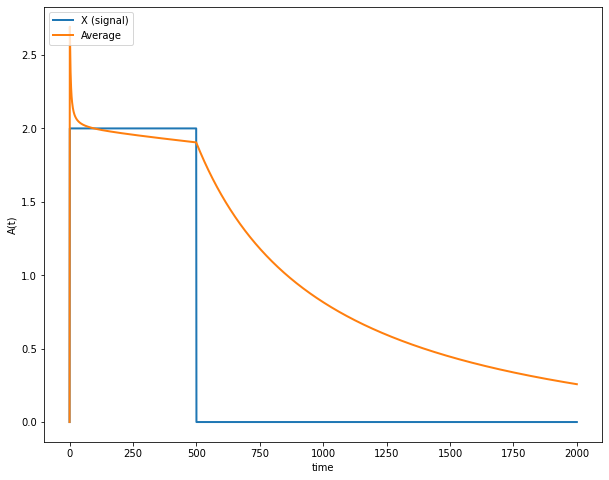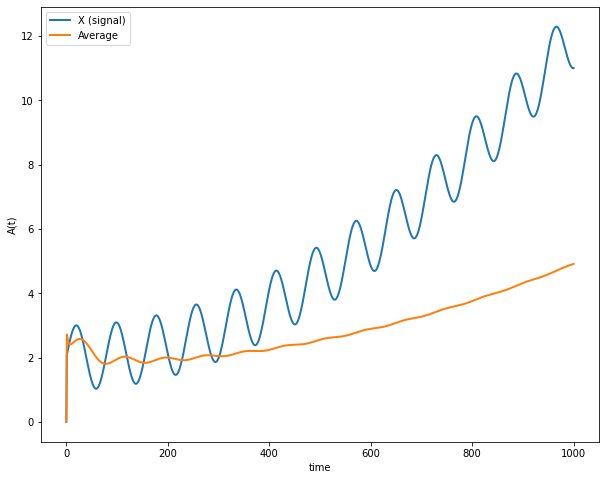

# Template Code for GRN With Variable Signal

lets try to solve for a simple GRN A -> B where A has a sin wave input


$$\frac{d[B]}{dt} = r_\beta \frac{1}{1+([A])^2} - \gamma \times [B]$$

$$A(t) = A_osin(t)$$

as such, $r_\beta = 10$, $n = 2$, $\gamma = 0.001$

[[223.        ]
 [221.80332939]]


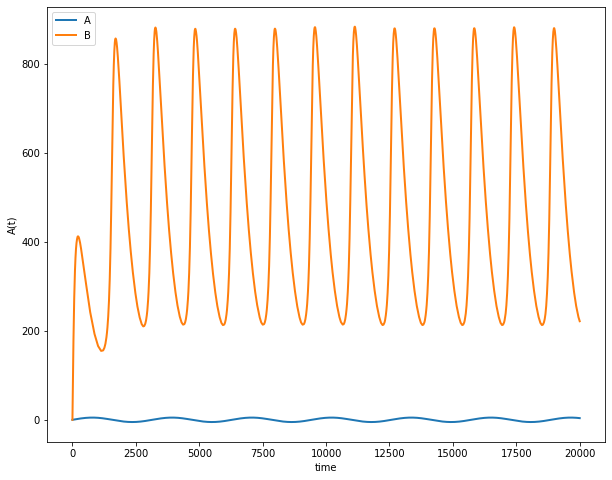

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

r_beta = 5
gamma = 0.002
n = 2

A0=5
B0=0
C0=2

#define the functions

def F(MP, t, A, r_beta, gamma, n):

  B = MP[0]

  dBdt = r_beta * (1 / (1+A**n)) - gamma * B

  return np.array([dBdt])

def FA(t):
  return A0*np.sin(gamma*10*t)
  #return A0*gamma*10*t


T = 20000
#T = 20
sample_number = 2000
#sample_number = 20

t = np.linspace(0, T, sample_number)
P0 = np.array([B0])

B_t = np.linspace(0, T, sample_number)
A_t = np.linspace(0, T, sample_number)

#odeint(Function, Initial Values, Timespace, Arguments)
for i in range(1,sample_number):
  # the time span for next timestep 
  # (only previous results and current calculated results are considered)
  tspan = [t[i-1],t[i]]
  # new value of A (variable input)
  A = FA(i)
  # store value of A for graphing
  A_t[i] = A
  # solves ODE for next time step
  P_t = odeint(F, P0, tspan, args=(A, r_beta, gamma, n))
  # stores the value of B for graphing
  B_t[i] = P_t[1]
  # updates next intial position
  P0[0] = P_t[1]

print(P_t)

plt.plot(t, A_t, "-", linewidth=2, label="A")
plt.plot(t, B_t, "-", linewidth=2, label="B")
plt.legend(loc = "upper left")
plt.xlabel("time")
plt.ylabel("A(t)")
plt.show()

# Preliminary Testing and Stuff 


x --> y --> z 

y |-- z

[[0. 0.]
 [0. 0.]]


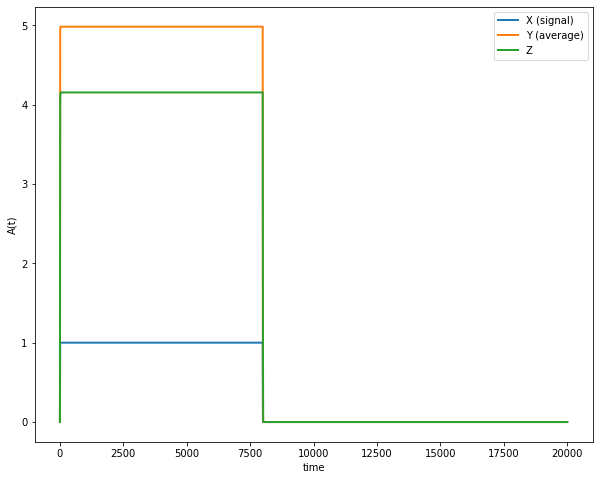

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

r_beta = 2
r_gamma = 2
r_zeta = 2
gamma = 0.4

'''
r_beta = 1
r_gamma = 1
r_zeta = 1
gamma = 0.49

works i think its brute force tho
'''
n = 1

X0 = 1
Y0 = 1
Z0 = 1

#define the functions

def F(MP, t, X, r_beta, r_gamma, r_zeta, gamma, n):

  Y = MP[0]
  Z = MP[1]

  #dYdt = r_beta * (X**n / (1+X**n)) + gamma * Y * (Z**n/ (1+Z**n)) - gamma * Y
  dYdt = r_beta * X  - gamma * Y
  #dYdt = r_beta * (1 / (1+X**n)) - gamma * Y
  dZdt = r_zeta * (Y**n / (1+Y**n)) - gamma * Z

  return np.array([dYdt, dZdt])
'''
def FS(t):
  return X0*np.sin(gamma*0.02*t) + X0
  #return A0*gamma*10*t
'''

def FS(t):
  if t < 800:
    return X0
  return 0
  #return A0*gamma*10*t



T = 20000
#T = 20
sample_number = 2000
#sample_number = 20

t = np.linspace(0, T, sample_number)
P0 = np.array([Y0, Z0])

X_t = np.linspace(0, T, sample_number)
Y_t = np.linspace(0, T, sample_number)
Z_t = np.linspace(0, T, sample_number)

#odeint(Function, Initial Values, Timespace, Arguments)
for i in range(1,sample_number):
  # the time span for next timestep 
  # (only previous results and current calculated results are considered)
  tspan = [t[i-1],t[i]]
  # new value of A (variable input)
  X = FS(i)
  # store value of A for graphing
  X_t[i] = X
  # solves ODE for next time step
  P_t = odeint(F, P0, tspan, args=(X, r_beta, r_gamma, r_zeta, gamma, n))
  # stores the value of B for graphing
  Y_t[i] = P_t[1][0]
  Z_t[i] = P_t[1][1]
  # updates next intial position
  P0[0] = P_t[1][0]
  P0[1] = P_t[1][1]

print(P_t)

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(t, X_t, "-", linewidth=2, label="X (signal)")
plt.plot(t, Y_t, "-", linewidth=2, label="Y (average)")
plt.plot(t, Z_t, "-", linewidth=2, label="Z")
plt.legend(loc = "upper right")
plt.xlabel("time")
plt.ylabel("A(t)")
plt.show()

[[0.         2.        ]
 [0.89590842 2.02687724]]


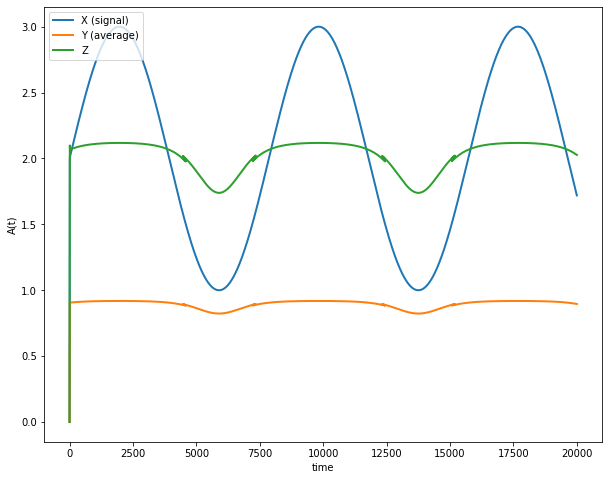

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

r_beta = 2
r_gamma = 2
r_zeta = 2
gamma = 0.4

'''
r_beta = 1
r_gamma = 1
r_zeta = 1
gamma = 0.49

works i think its brute force tho
'''
n = 3

X0 = 1
Y0 = 1
Z0 = 1

#define the functions

def F(MP, t, X, r_beta, r_gamma, r_zeta, gamma, n):

  Y = MP[0]
  Z = MP[1]

  #dYdt = r_beta * (X**n / (1+X**n)) + r_gamma * (1 / (1+Z**n))  - gamma * Y
  dYdt = r_beta * (X**n / (1+X**n)) * r_gamma * (1/ (1+Z**n)) - gamma * Y
  dZdt = r_zeta * (Y**n / (1+Y**n)) - gamma * Z

  return np.array([dYdt, dZdt])

def FS(t):
  return X0*np.sin(gamma*0.02*t) + X0*2
  #return A0*gamma*10*t

'''
def FS(t):
  if t < 1000:
    return X0
  return 0
  #return A0*gamma*10*t
'''


T = 20000
#T = 20
sample_number = 2000
#sample_number = 20

t = np.linspace(0, T, sample_number)
P0 = np.array([Y0, Z0])

X_t = np.linspace(0, T, sample_number)
Y_t = np.linspace(0, T, sample_number)
Z_t = np.linspace(0, T, sample_number)

#odeint(Function, Initial Values, Timespace, Arguments)
for i in range(1,sample_number):
  # the time span for next timestep 
  # (only previous results and current calculated results are considered)
  tspan = [t[i-1],t[i]]
  # new value of A (variable input)
  X = FS(i)
  # store value of A for graphing
  X_t[i] = X
  # solves ODE for next time step
  P_t = odeint(F, P0, tspan, args=(X, r_beta, r_gamma, r_zeta, gamma, n))
  # stores the value of B for graphing
  Y_t[i] = P_t[1][0]
  Z_t[i] = P_t[1][1]
  # updates next intial position
  P0[0] = P_t[1][0]
  P0[1] = P_t[1][1]

print(P_t)

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(t, X_t, "-", linewidth=2, label="X (signal)")
plt.plot(t, Y_t, "-", linewidth=2, label="Y (average)")
plt.plot(t, Z_t, "-", linewidth=2, label="Z")
plt.legend(loc = "upper left")
plt.xlabel("time")
plt.ylabel("A(t)")
plt.show()

[[5.44389981e+00 1.77035650e+04 9.00000000e+00]
 [5.44401488e+00 1.77212285e+04 9.00000000e+00]]


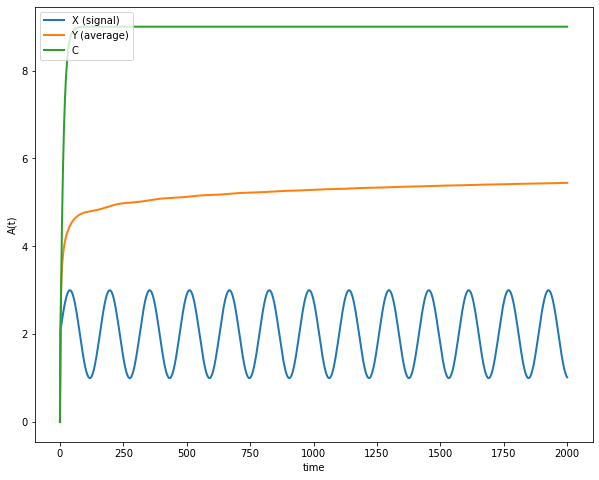

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

r_beta = 1.0
r_gamma = 1
r_zeta = 1
r_c = 1
gamma = 0.000001
gamma_c = 0.1
gamma_z = 0.00001

'''
r_beta = 1
r_gamma = 1
r_zeta = 1
gamma = 0.49

works i think its brute force tho
'''
n = 1

X0 = 1.0
Y0 = 0.0
C0 = 1.0
Z0 = 0.0

#define the functions

def F(MP, t, X, r_beta, r_gamma, r_zeta, gamma, n):

  Y = MP[0]
  Z = MP[1]
  C = MP[2]

  #dYdt = r_beta * X - gamma * Y
  dYdt = r_beta * X * (1 / (1+Z**n))
  dCdt = r_c * (C**1 / (1+C**1)) - gamma_c * C
  #dCdt = 0
  dZdt = r_zeta * C  - gamma_z * Z

  return np.array([dYdt, dZdt, dCdt])

def FS(t):
  return X0*np.sin(0.08*t) + 2*X0
  #return A0*gamma*10*t

'''
def FS(t):
  if t < 500:
    return 2*X0
  return 0
  #return A0*gamma*10*t
'''


T = 2000
#T = 20
sample_number = 1000
#sample_number = 20

t = np.linspace(0, T, sample_number)
P0 = np.array([Y0, Z0, C0])

X_t = np.linspace(0, T, sample_number)
Y_t = np.linspace(0, T, sample_number)
Z_t = np.linspace(0, T, sample_number)
C_t = np.linspace(0, T, sample_number)

#odeint(Function, Initial Values, Timespace, Arguments)
for i in range(1,sample_number):
  # the time span for next timestep 
  # (only previous results and current calculated results are considered)
  tspan = [t[i-1],t[i]]
  # new value of A (variable input)
  X = FS(i)
  # store value of A for graphing
  X_t[i] = X
  # solves ODE for next time step
  P_t = odeint(F, P0, tspan, args=(X, r_beta, r_gamma, r_zeta, gamma, n))
  # stores the value of B for graphing
  Y_t[i] = P_t[1][0]
  Z_t[i] = P_t[1][1]
  C_t[i] = P_t[1][2]
  # updates next intial position
  P0[0] = P_t[1][0]
  P0[1] = P_t[1][1]
  P0[2] = P_t[1][2]

print(P_t)

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(t, X_t, "-", linewidth=2, label="X (signal)")
plt.plot(t, Y_t, "-", linewidth=2, label="Y (average)")
#plt.plot(t, Z_t, "-", linewidth=2, label="Z")
plt.plot(t, C_t, "-", linewidth=2, label="C")
plt.legend(loc = "upper left")
plt.xlabel("time")
plt.ylabel("A(t)")
plt.show()

[[9.98998999e+02 9.98998999e+02 1.00000000e+00 4.00485774e-03]
 [9.98998999e+02 1.00000000e+03 1.00000000e+00 3.00387096e-03]]


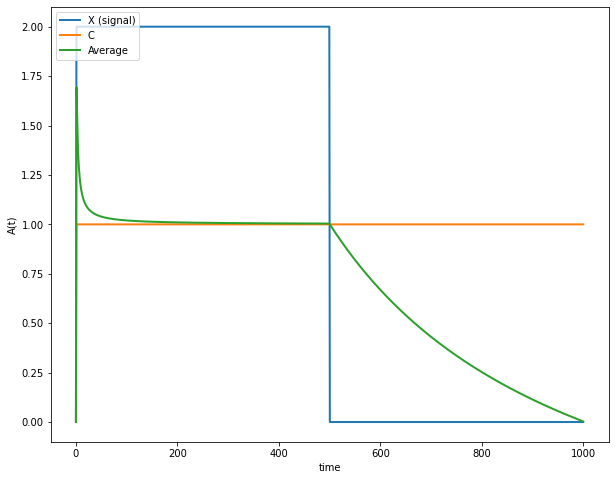

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

r_beta:float = 1.0
r_gamma:float = 1.0
r_zeta:float = 1.0
r_c:float = 1.0
r_1:float = 1
r_2:float = 1
gamma:float = 0.000001
gamma_c:float = 0.5
gamma_z:float = 0.00001
gamma_a:float = 0.00001

'''
r_beta = 1
r_gamma = 1
r_zeta = 1
gamma = 0.49

works i think its brute force tho
'''
n = 1

X0:float = 1.0
Y0:float = 0.0
C0:float = 1
Z0:float = 0.0
A0:float = 1.0

#define the functions

def F(MP, t, X, r_beta, r_gamma, r_zeta, gamma, n):

  Y = MP[0]
  Z = MP[1]
  C = MP[2]
  A = MP[3]

  dYdt = r_beta * X
  dCdt = r_c * (C**1 / (1+C**1)) - gamma_c * C
  #dCdt = 0
  dZdt = r_zeta * C
  dAdt = (r_1 /(Z+1) * X) - (r_2 /(Z**2 + 1) * Y)
  return np.array([dYdt, dZdt, dCdt, dAdt])

'''
def FS(t):
  return X0*np.sin(0.08*t) + 2*X0 + 0.00001 * t**2
  #return A0*gamma*10*t

'''
def FS(t):
  if t < 500:
    return 2*X0
  return 0
  #return A0*gamma*10*t



T = 1000
#T = 20
sample_number = 1000
#sample_number = 20

t = np.linspace(0, T, sample_number)
P0 = np.array([Y0, Z0, C0, A0])

X_t = np.linspace(0, T, sample_number)
Y_t = np.linspace(0, T, sample_number)
Z_t = np.linspace(0, T, sample_number)
C_t = np.linspace(0, T, sample_number)
A_t = np.linspace(0, T, sample_number)

#odeint(Function, Initial Values, Timespace, Arguments)
for i in range(1,sample_number):
  # the time span for next timestep 
  # (only previous results and current calculated results are considered)
  tspan = [t[i-1],t[i]]
  # new value of A (variable input)
  X = FS(i)
  # store value of A for graphing
  X_t[i] = X
  # solves ODE for next time step
  P_t = odeint(F, P0, tspan, args=(X, r_beta, r_gamma, r_zeta, gamma, n))
  # stores the value of B for graphing
  Y_t[i] = P_t[1][0]
  Z_t[i] = P_t[1][1]
  C_t[i] = P_t[1][2]
  A_t[i] = P_t[1][3]
  # updates next intial position
  P0[0] = P_t[1][0]
  P0[1] = P_t[1][1]
  P0[2] = P_t[1][2]
  P0[3] = P_t[1][3]
  #print(P_t[1][3])



print(P_t)

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(t, X_t, "-", linewidth=2, label="X (signal)")
#plt.plot(t, Y_t, "-", linewidth=2, label="Y (integral)")
#plt.plot(t, Z_t, "-", linewidth=2, label="Z")
plt.plot(t, C_t, "-", linewidth=2, label="C")
plt.plot(t, A_t, "-", linewidth=2, label="Average")
plt.legend(loc = "upper left")
plt.xlabel("time")
plt.ylabel("A(t)")
plt.show()